In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Fish.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Species']]).toarray())
df = df.join(enc_df)

In [15]:
df.iloc[:,2:]

(     Length1  Length2  Length3   Height   Width    0    1    2    3    4    5  \
 0       23.2     25.4     30.0  11.5200  4.0200  1.0  0.0  0.0  0.0  0.0  0.0   
 1       24.0     26.3     31.2  12.4800  4.3056  1.0  0.0  0.0  0.0  0.0  0.0   
 2       23.9     26.5     31.1  12.3778  4.6961  1.0  0.0  0.0  0.0  0.0  0.0   
 3       26.3     29.0     33.5  12.7300  4.4555  1.0  0.0  0.0  0.0  0.0  0.0   
 4       26.5     29.0     34.0  12.4440  5.1340  1.0  0.0  0.0  0.0  0.0  0.0   
 ..       ...      ...      ...      ...     ...  ...  ...  ...  ...  ...  ...   
 154     11.5     12.2     13.4   2.0904  1.3936  0.0  0.0  0.0  0.0  0.0  1.0   
 155     11.7     12.4     13.5   2.4300  1.2690  0.0  0.0  0.0  0.0  0.0  1.0   
 156     12.1     13.0     13.8   2.2770  1.2558  0.0  0.0  0.0  0.0  0.0  1.0   
 157     13.2     14.3     15.2   2.8728  2.0672  0.0  0.0  0.0  0.0  0.0  1.0   
 158     13.8     15.0     16.2   2.9322  1.8792  0.0  0.0  0.0  0.0  0.0  1.0   
 
        6  
 0

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,2:],
    df.Weight,
    test_size=0.2,
    random_state=100
)

In [50]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9204863749369904

In [51]:
model_n = LinearRegression(normalize=True)
model_n.fit(X_train,y_train)
model_n.score(X_test,y_test)

0.9204863749369897

In [28]:
yhat = model.predict(X_test)

In [37]:
def mostra_erro(y_test, yhat):
    mae = metrics.mean_absolute_error(y_test, yhat)
    mse = metrics.mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse) # or mse**(0.5)  
    r2 = metrics.r2_score(y_test,yhat)

    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)
mostra_erros(y_test,yhat)

Results of sklearn.metrics:
MAE: 76.01699039504487
MSE: 9779.479473070176
RMSE: 98.89125074075146
R-Squared: 0.9204863749369904


In [31]:
X_train

,Length1,Length2,Length3,Height,Width,0,1,2,3,4,5,6
120,37.0,40.0,42.5,11.7300,7.2250,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65,18.4,20.0,22.4,8.8928,3.2928,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,29.1,31.5,36.4,13.7592,4.3680,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16,30.4,33.0,38.3,14.8604,5.2854,1.0,0.0,0.0,0.0,0.0,0.0,0.0
62,14.3,15.5,17.4,6.5772,2.3142,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,20.0,22.0,23.5,5.6400,3.5250,0.0,0.0,1.0,0.0,0.0,0.0,0.0
103,25.4,27.5,28.9,7.1672,4.3350,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67,19.0,20.7,23.2,9.3960,3.4104,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24,31.9,35.0,40.5,16.2405,5.5890,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam
from sklearn.metrics import r2_score

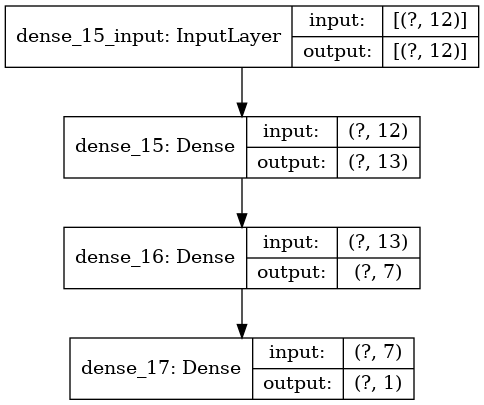

In [47]:
model_nn = Sequential()
model_nn.add(Dense(13, input_dim=12, kernel_initializer='normal', activation='relu')) # camada oculta
model_nn.add(Dense(7, kernel_initializer='normal', activation='relu'))# entrada
#model_nn.add(Dense(3, kernel_initializer='normal', activation='relu'))
model_nn.add(Dense(1, kernel_initializer='normal')) # saída
opt = Adam(learning_rate=0.1)
model_nn.compile(loss='mean_squared_error', optimizer=opt)
plot_model(model_nn, show_shapes=True, show_layer_names=True)

In [48]:
model_nn.fit(X_train, y_train, epochs=150, batch_size=32)

Epoch 1/150
4/4 [==============================] - 0s 9ms/step - loss: 277207.8750
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 230857.2031
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 95087.2734
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 89634.5469
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 57271.7773
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 59827.1797
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 58577.2422
Epoch 8/150
4/4 [==============================] - 0s 14ms/step - loss: 48590.3555
Epoch 9/150
4/4 [==============================] - 0s 18ms/step - loss: 51193.5820
Epoch 10/150
4/4 [==============================] - 0s 9ms/step - loss: 48128.5820
Epoch 11/150
4/4 [==============================] - 0s 9ms/step - loss: 47660.0312
Epoch 12/150
4/4 [==============================] - 0s 4ms/step - loss: 47933.1094
Epoch 13

4/4 [==============================] - 0s 2ms/step - loss: 14097.5723
Epoch 100/150
4/4 [==============================] - 0s 6ms/step - loss: 15102.3584
Epoch 101/150
4/4 [==============================] - 0s 3ms/step - loss: 13857.8174
Epoch 102/150
4/4 [==============================] - 0s 5ms/step - loss: 11188.2334
Epoch 103/150
4/4 [==============================] - 0s 2ms/step - loss: 11062.3926
Epoch 104/150
4/4 [==============================] - 0s 4ms/step - loss: 9497.1348
Epoch 105/150
4/4 [==============================] - 0s 27ms/step - loss: 7603.9360
Epoch 106/150
4/4 [==============================] - 0s 3ms/step - loss: 8784.4414
Epoch 107/150
4/4 [==============================] - 0s 7ms/step - loss: 9746.8740
Epoch 108/150
4/4 [==============================] - 0s 10ms/step - loss: 8024.1519
Epoch 109/150
4/4 [==============================] - 0s 2ms/step - loss: 9153.7461
Epoch 110/150
4/4 [==============================] - 0s 6ms/step - loss: 8058.4092
Epoch 111/1

In [49]:
mostra_erro(y_test,model_nn.predict(X_test))

Results of sklearn.metrics:
MAE: 52.62526942491531
MSE: 4792.262344835633
RMSE: 69.22616806407554
R-Squared: 0.9610357430229144
